In [87]:
import networkx as nx

ModuleNotFoundError: No module named 'networkx'

In [ ]:
nodes = [1, 2, 3]
edges = [()]

In [3]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from()


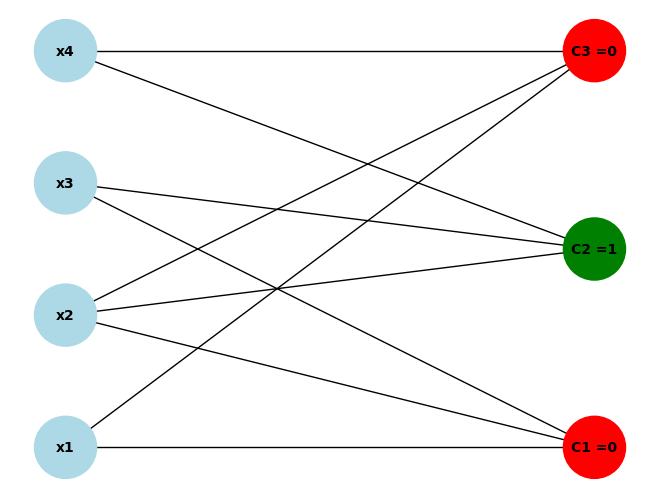

In [52]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_xorsat_problem(variables, constraints):
    """
    Visualize a Max-3-XORSAT problem using NetworkX, with constraint nodes colored 
    based on their XOR value (0 = red, 1 = yellow).
    
    :param variables: List of variable names (e.g., ['x1', 'x2', 'x3']).
    :param constraints: List of XOR constraints. Each constraint is a tuple of 
                        (v1, v2, v3, b), where v1, v2, and v3 are the variables involved,
                        and b is the result of their XOR (0 or 1).
    """
    # Create a bipartite graph where one set is variables and the other is constraints
    G = nx.Graph()

    # Add the variables as one set of nodes
    for var in variables:
        G.add_node(var, bipartite=0)

    # Add the constraints as nodes and connect them to the variables involved
    for i, (v1, v2, v3, b) in enumerate(constraints):
        # Add a node representing the constraint
        constraint_node = f"C{i+1} ={b}"
        G.add_node(constraint_node, bipartite=1)
        
        # Add edges between the variables and the constraint node
        G.add_edge(v1, constraint_node)
        G.add_edge(v2, constraint_node)
        G.add_edge(v3, constraint_node)

    # Assign node colors: light blue for variables, red for XOR=0, yellow for XOR=1
    node_colors = []
    for node in G.nodes:
        if G.nodes[node].get('bipartite') == 0:
            node_colors.append('lightblue')  # Variables (light blue)
        else:
            # Constraint nodes: red for XOR=0, yellow for XOR=1
            xor_value = int(node.split('=')[1][0])  # Extract XOR value (0 or 1)
            if xor_value == 0:
                node_colors.append('red')  # XOR=0 (red)
            else:
                node_colors.append('green')  # XOR=1 (yellow)

    # Draw the graph
    pos = nx.bipartite_layout(G, nodes=variables)#nx.spring_layout(G)  # Position nodes using spring layout
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=10, font_weight="bold")
    plt.show()

# Example variables and constraints
variables = ['x1', 'x2', 'x3', 'x4']
constraints = [
    ('x1', 'x2', 'x3', 0),  # x1 ⊕ x2 ⊕ x3 = 0 (red)
    ('x2', 'x3', 'x4', 1),  # x1 ⊕ x2 ⊕ x3 = 1 (yellow)
    ('x1', 'x2', 'x4', 0),  # x1 ⊕ x2 ⊕ x4 = 0 (red)
    #('x2', 'x3', 'x4', 1),  # x2 ⊕ x3 ⊕ x4 = 1 (yellow)
]

# Visualize the problem
visualize_xorsat_problem(variables, constraints)


## Mapping the Max-3-XORSAT problem into qubits 



In [53]:

def create_xorsat_graph(variables, constraints):
    """
    Visualize a Max-3-XORSAT problem using NetworkX, with constraint nodes colored 
    based on their XOR value (0 = red, 1 = yellow).
    
    :param variables: List of variable names (e.g., ['x1', 'x2', 'x3']).
    :param constraints: List of XOR constraints. Each constraint is a tuple of 
                        (v1, v2, v3, b), where v1, v2, and v3 are the variables involved,
                        and b is the result of their XOR (0 or 1).
    """
    # Create a bipartite graph where one set is variables and the other is constraints
    G = nx.Graph()
    node_color = []
    # Add the variables as one set of nodes
    for var in variables:
        G.add_node(var, bipartite=0)
        node_color.append('lightblue')

    
    # Add the constraints as nodes and connect them to the variables involved
    for i, (v1, v2, v3, b) in enumerate(constraints):
        # Add a node representing the constraint
        constraint_node = f"C{i+1}"# ={b}"
        G.add_node(constraint_node, bipartite=1)
        if b == 0:
            node_color.append('red')
        else:
            node_color.append('green')
        
        # Add edges between the variables and the constraint node
        G.add_edge(v1, constraint_node)
        G.add_edge(v2, constraint_node)
        G.add_edge(v3, constraint_node)


    return G, node_color

# Example variables and constraints
variables = ['x1', 'x2', 'x3', 'x4']
constraints = [
    ('x1', 'x2', 'x3', 0),  # x1 ⊕ x2 ⊕ x3 = 0 (red)
   ('x2', 'x3', 'x4', 1),  # x1 ⊕ x2 ⊕ x3 = 1 (yellow)
    ('x1', 'x2', 'x4', 0),  # x1 ⊕ x2 ⊕ x4 = 0 (red)
    #('x2', 'x3', 'x4', 1),  # x2 ⊕ x3 ⊕ x4 = 1 (yellow)
]

# Visualize the problem
#visualize_xorsat_problem(variables, constraints)

def visualize_graph(Graph=None, node_color= None):
    G = Graph
    node_colors = node_color
    # Assign node colors: light blue for variables, red for XOR=0, yellow for XOR=1
    # node_colors = []
    # for node in G.nodes:
    #     if G.nodes[node].get('bipartite') == 0:
    #         node_colors.append('lightblue')  # Variables (light blue)
    #     else:
    #         # Constraint nodes: red for XOR=0, yellow for XOR=1
    #         xor_value = int(node.split('=')[1][0])  # Extract XOR value (0 or 1)
    #         if xor_value == 0:
    #             node_colors.append('red')  # XOR=0 (red)
    #         else:
    #             node_colors.append('green')  # XOR=1 (yellow)
    # Draw the graph
    pos = nx.bipartite_layout(G, nodes=variables)#nx.spring_layout(G)  # Position nodes using spring layout
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=10, font_weight="bold")
    plt.show()
#Graph, node_color=create_xorsat_graph(variables,constraints)
#visualize_graph(Graph, node_color)


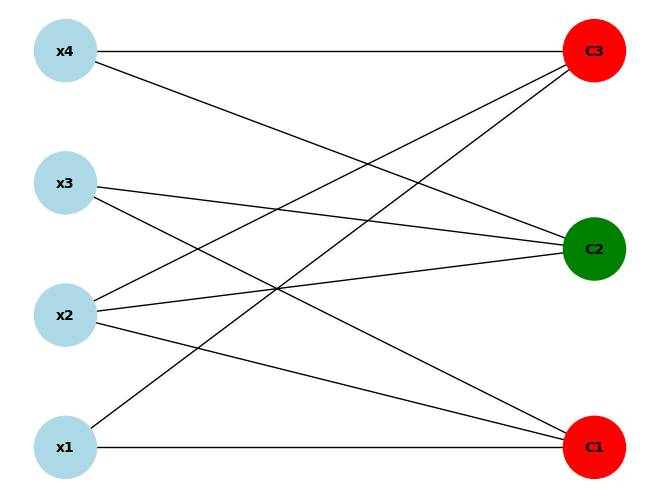

In [54]:
G,node_color = create_xorsat_graph(variables,constraints)
visualize_graph(G, node_color)

In [44]:

from networkx.algorithms import bipartite
b,t = bipartite.sets(G)
b 
t

{'C1', 'C2', 'C3'}

In [50]:
G.nodes()
type(G.edges(t))
#["C1"]
for i in G.edges(t):
    print(i[0])
        

('C1', 'x1')
('C1', 'x2')
('C1', 'x3')
('C2', 'x1')
('C2', 'x2')
('C2', 'x3')
('C3', 'x1')
('C3', 'x2')
('C3', 'x4')


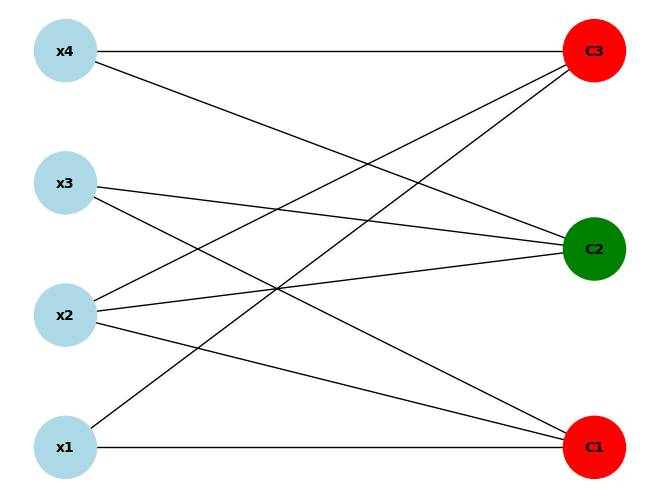

In [55]:
visualize_graph(G, node_color)

In [1]:
from qiskit import QuantumCircuit, Aer, transpile, ClassicalRegister
from qiskit.visualization import plot_gate_map, plot_error_map, plot_histogram
from qiskit.providers.fake_provider import FakeQuitoV2, FakeNairobiV2

In [153]:
A = np.array([[1,0,1,0,1,0],[1,0,0,0,1,1],[0,0,0,1,1,1],[1,1,1,0,0,0],[0,1,0,1,1,0],[0,1,0,0,1,1]])#,[0,1,0,1,1,0],[1,0,1,0,1,0]])
B = np.array([0,1,0,0,0,1])#,1,1])
print(np.linalg.inv(A)@(B))#.transpose()))

[ 0.33333333  0.33333333 -0.66666667 -0.66666667  0.33333333  0.33333333]


In [2]:
from qiskit import QuantumCircuit
import numpy as np

# dictionary to map the constrained SAT problem 
#('x1', 'x2', 'x3', 0),  # x1 ⊕ x2 ⊕ x3 = 0 (red)
#('x2', 'x3', 'x4', 1),  # x1 ⊕ x2 ⊕ x3 = 1 (yellow)
#('x1', 'x2', 'x4', 0)
#('x1', 'x3', 'x4', 0)

#prob_stat = {"012": 1,"013": 1,"123":-1}

#prob_stat = {"012": 1,"013": 1,"123": -1,"023":1 }
prob_stat = {"024": 1,"045":-1,"345": 1,"012":1,"134":1,"145":-1,"124":1,"013":1 }
prob_stat

{'024': 1,
 '045': -1,
 '345': 1,
 '012': 1,
 '134': 1,
 '145': -1,
 '124': 1,
 '013': 1}

In [3]:
def append_zzz_term(qc,qbits , gamma):
    q1, q2, q3 = [int(i) for i in qbits]
    qc.cx(q1,q2)
    qc.cx(q2,q3)
    qc.rz(2*gamma, q3)
    qc.cx(q2,q3)
    qc.cx(q1,q2)
    
def append_x_term(qc,q1,beta):
    qc.rx(2*beta,q1)
    

def append_cost_operator_circuit(qc, prob_stat, gamma):
    
    for i in prob_stat.keys():
        append_zzz_term(qc,i, gamma)

def append_mixer_operator_circuit(qc,Nvertices, beta):
    for i in range(Nvertices):
        append_x_term(qc,i, beta)
    return qc   
           
qc = QuantumCircuit(4)

#append_cost_operator_circuit(qc,prob_stat,gamma=np.pi/3)
#qc.draw()

append_mixer_operator_circuit(qc,4,np.pi/6).draw()

┌─────────┐
q_0: ┤ Rx(π/3) ├
     ├─────────┤
q_1: ┤ Rx(π/3) ├
     ├─────────┤
q_2: ┤ Rx(π/3) ├
     ├─────────┤
q_3: ┤ Rx(π/3) ├
     └─────────┘

In [4]:
def create_qaoa_circuit(prob_stat,  beta,gamma):
    assert(len(beta) ==len(gamma))
    p = len(beta)
    Nvertices = 6 # number of variables
    circ = QuantumCircuit(Nvertices)
    # initialize to all plus state
    circ.h(range(Nvertices))
    # apply p alternating layer of cost and mixer to build an qaoa circuit
    for i in range(p):
        append_cost_operator_circuit(circ,prob_stat,beta[i])
        circ.barrier()
        append_mixer_operator_circuit(circ,Nvertices,gamma[i])
        circ.barrier()
    #circ.barrier()
    circ.measure_all()
    return circ

In [5]:
qc =create_qaoa_circuit(prob_stat, beta = [np.pi/3],gamma=[np.pi/2])
qc.draw()

┌───┐                                                                »
   q_0: ┤ H ├──■──────────────────────────■────■──────────────────────────■──»
        ├───┤  │                          │    │                          │  »
   q_1: ┤ H ├──┼──────────────────────────┼────┼──────────────────────────┼──»
        ├───┤┌─┴─┐                      ┌─┴─┐  │                          │  »
   q_2: ┤ H ├┤ X ├──■────────────────■──┤ X ├──┼──────────────────────────┼──»
        ├───┤└───┘  │                │  └───┘  │                          │  »
   q_3: ┤ H ├───────┼────────────────┼─────────┼──────────────────────────┼──»
        ├───┤     ┌─┴─┐┌──────────┐┌─┴─┐     ┌─┴─┐                      ┌─┴─┐»
   q_4: ┤ H ├─────┤ X ├┤ Rz(2π/3) ├┤ X ├─────┤ X ├──■────────────────■──┤ X ├»
        ├───┤     └───┘└──────────┘└───┘     └───┘┌─┴─┐┌──────────┐┌─┴─┐└───┘»
   q_5: ┤ H ├─────────────────────────────────────┤ X ├┤ Rz(2π/3) ├┤ X ├─────»
        └───┘                                     └───┘└──────────┘└───┘     »
meas: 6/═════════════════════════════════════════════════════════════════════»
                                                                             »
«                                                                             »
«   q_0: ──■──────────────────────────■───────────────────────────────────────»
«        ┌─┴─┐                      ┌─┴─┐                                     »
«   q_1: ┤ X ├──■────────────────■──┤ X ├──■──────────────────────────■────■──»
«        └───┘┌─┴─┐┌──────────┐┌─┴─┐└───┘  │                          │    │  »
«   q_2: ─────┤ X ├┤ Rz(2π/3) ├┤ X ├───────┼──────────────────────────┼────┼──»
«             └───┘└──────────┘└───┘     ┌─┴─┐                      ┌─┴─┐  │  »
«   q_3: ──■──────────────────────────■──┤ X ├──■────────────────■──┤ X ├──┼──»
«        ┌─┴─┐                      ┌─┴─┐└───┘┌─┴─┐┌──────────┐┌─┴─┐└───┘┌─┴─┐»
«   q_4: ┤ X ├──■────────────────■──┤ X ├─────┤ X ├┤ Rz(2π/3) ├┤ X ├─────┤ X ├»
«        └───┘┌─┴─┐┌──────────┐┌─┴─┐└───┘     └───┘└──────────┘└───┘     └───┘»
«   q_5: ─────┤ X ├┤ Rz(2π/3) ├┤ X ├──────────────────────────────────────────»
«             └───┘└──────────┘└───┘                                          »
«meas: 6/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«                                                                             »
«   q_0: ─────────────────────────────────────────────────────────────■───────»
«                                                                   ┌─┴─┐     »
«   q_1: ────────────────────────■────■──────────────────────────■──┤ X ├──■──»
«                                │  ┌─┴─┐                      ┌─┴─┐└───┘  │  »
«   q_2: ────────────────────────┼──┤ X ├──■────────────────■──┤ X ├───────┼──»
«                                │  └───┘  │                │  └───┘     ┌─┴─┐»
«   q_3: ────────────────────────┼─────────┼────────────────┼────────────┤ X ├»
«                              ┌─┴─┐     ┌─┴─┐┌──────────┐┌─┴─┐          └───┘»
«   q_4: ──■────────────────■──┤ X ├─────┤ X ├┤ Rz(2π/3) ├┤ X ├───────────────»
«        ┌─┴─┐┌──────────┐┌─┴─┐└───┘     └───┘└──────────┘└───┘               »
«   q_5: ┤ X ├┤ Rz(2π/3) ├┤ X ├───────────────────────────────────────────────»
«        └───┘└──────────┘└───┘                                               »
«meas: 6/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«                               ░ ┌───────┐ ░  ░ ┌─┐               
«   q_0: ───────────────────■───░─┤ Rx(π) ├─░──░─┤M├───────────────
«                         ┌─┴─┐ ░ ├───────┤ ░  ░ └╥┘┌─┐            
«   q_1: ──────────────■──┤ X ├─░─┤ Rx(π) ├─░──░──╫─┤M├────────────
«                      │  └───┘ ░ ├───────┤ ░  ░  ║ └╥┘┌─┐         
«   q_2: ──────────────┼────────░─┤ Rx(π) ├─░──░──╫──╫─┤M├─────────
«        ┌─────

In [6]:
prob_stat

{'024': 1,
 '045': -1,
 '345': 1,
 '012': 1,
 '134': 1,
 '145': -1,
 '124': 1,
 '013': 1}

In [6]:
def invert_counts(counts):
    return {k[::-1]:v for k, v in counts.items()}

cc = {'111101': 12, '110010': 9}

invert_counts(cc)

{'101111': 12, '010011': 9}

In [7]:
import matplotlib.pyplot as plt
from collections import defaultdict
from operator import itemgetter
from scipy.optimize import minimize
from qiskit import QuantumCircuit, transpile
#from qiskit.providers.fake_provider import GenericBackendV2

def invert_counts(counts):
    return {k[::-1]:v for k, v in counts.items()}

backend = FakeNairobiV2() #GenericBackendV2(num_qubits=4)
job = backend.run(qc)
result = job.result()
print(invert_counts(result.get_counts()))

{'111010': 12, '100011': 13, '110010': 12, '001010': 23, '011010': 10, '000100': 18, '001100': 18, '101111': 10, '011101': 16, '010101': 14, '001101': 18, '111100': 10, '011001': 18, '000001': 14, '110000': 19, '010010': 22, '011100': 17, '001001': 17, '100100': 18, '001011': 14, '110101': 18, '101001': 14, '100000': 10, '010110': 15, '101110': 8, '111110': 18, '110110': 14, '110111': 14, '110100': 20, '000110': 13, '010100': 21, '100111': 13, '000010': 15, '101010': 16, '100001': 21, '010111': 14, '000000': 14, '011110': 13, '010001': 30, '000111': 18, '101011': 13, '010000': 14, '111000': 16, '011011': 14, '110001': 18, '100101': 14, '111101': 18, '101100': 17, '111111': 18, '011111': 16, '011000': 18, '100010': 28, '100110': 13, '000101': 17, '111011': 15, '001111': 11, '101000': 15, '110011': 20, '101101': 10, '001110': 20, '010011': 14, '111001': 16, '001000': 15, '000011': 22}


In [80]:
prob_stat

{'024': 1,
 '045': -1,
 '345': 1,
 '012': 1,
 '134': 1,
 '145': -1,
 '124': 1,
 '013': 1}

In [83]:

def compute_satisfied_constraints(bitstr = '110011'):#, bitcount = 1):
    
    const_sat = 0
    for key in prob_stat.keys():
        bit = [int(bitstr[int(j)]) for j in key]
        
        if (-1)**((bit[0] +bit[1]+bit[2])%2) ==(prob_stat[key]):
            const_sat+=1
        
    #print(const_sat)
    return const_sat

compute_satisfied_constraints()

8

In [82]:

def compute_Hijk(bitstr = '110011'):#, bitcount = 1):
    tot_hijk = 0
    
    for key in prob_stat.keys():
        #print(prob_stat)
        #key_list = [int(i) for i in key]
        #print(key_list)
        bit = [int(bitstr[int(j)]) for j in key]

        hijk_val =1
        for p in bit:
            #print("p =", p)
            hijk_val*=-prob_stat[key]*(-1)**p
        # print(hijk_val)
        tot_hijk+=hijk_val#*bitcount
    
    return tot_hijk
        

compute_Hijk()
compute_Hijk(bitstr="110011")

-8

In [9]:
# H = - \sum Vijk zizjzk
def compute_max_xorsat_energy(counts =invert_counts(result.get_counts()) ):
    energy = 0
    total_count =0
    for meas, meas_count in counts.items():
        obj_4_meas = compute_Hijk(bitstr=meas)#,bitcount=meas_count)
        #print(meas,"obj_4_meas", obj_4_meas)
        energy += obj_4_meas*meas_count
        # print(energy)
        total_count+=meas_count
    #print(energy, total_count)
    return energy/total_count
    
    
    
compute_max_xorsat_energy()

0.21875

In [182]:
#plot_error_map(FakeNairobiV2())

In [98]:
prob_stat

{'024': 1,
 '045': -1,
 '345': 1,
 '012': 1,
 '134': 1,
 '145': -1,
 '124': 1,
 '013': 1}

In [12]:
shots = 100000 #100000

In [19]:

def get_black_box_objective(p):
    backend = FakeNairobiV2()#FakeQuitoV2() #GenericBackendV2(num_qubits=4)
    def f(theta):
        # let's assume first half is betas, second half is gammas
        beta = theta[:p]
        gamma = theta[p:]
        qc = create_qaoa_circuit(prob_stat,beta, gamma)
        #print(qc)
        counts = backend.run(transpile(qc), shots = shots).result().get_counts()
        # return the energy
        energy = compute_max_xorsat_energy(invert_counts(counts=counts))
        obj_cost.append(energy)
        print("energy",energy)
        return energy
    return f

In [384]:
optimal_p13

array([ 3.10792366, -0.11430542,  1.61779401,  3.69955177,  2.73295043,
        0.91074827,  3.69196212,  2.28413125,  2.31614937,  4.35898739,
        1.65920174,  2.8209266 ,  4.48222373,  2.53458086,  1.06082758,
        1.70543068,  3.18733952,  0.78535542,  2.8818705 ,  0.47562741,
        0.19759593,  3.18477498,  3.11019851,  0.16718474,  1.49408089,
        1.38275996])

## Main conclusion is to have more shots to approach the right answer. 
Shouldn't for larger p values, we get closer to the solution anyway and hence should require less shots
### TODO 
### try the state-vector algorithm

In [13]:

import scipy 
scipy.__version__

'1.14.0'

energy -1.00616
energy -1.01254
energy -0.13252
energy 0.45628
energy 0.42846
energy 0.62942
energy -0.74778
energy -0.73056
energy -0.99414
energy -0.96594
energy -0.98458
energy -1.01564
energy -1.01906
energy -1.01122
energy -1.00574
energy -0.9986
energy -0.99858
energy -1.01624
energy -1.0073
energy -1.01008
energy -1.00918
energy 0.02254
energy 0.56698
energy 0.11946
energy 0.44432
energy -0.66132
energy -0.70894
energy -1.01214
energy -1.02578
energy -0.95624
energy -1.00414
energy -1.00908
energy -0.9813
energy -1.01934
energy -1.02328
energy -1.00664
energy -0.99526
energy -1.00958
energy 0.6074
energy -0.1146
energy -0.39662
energy -0.35376
energy -0.88716
energy -0.8881
energy -1.03192
energy -0.98932
energy -1.01302
energy -1.02744
energy -1.02588
energy -1.01382
energy -1.0376
energy -1.01962
energy -1.0213
energy -1.01908
energy -1.0156
energy -1.01632
energy -0.7169
energy 1.01534
energy 0.63562
energy 0.34454
energy -0.96044
energy -1.00148
energy -0.64088
energy -0.936

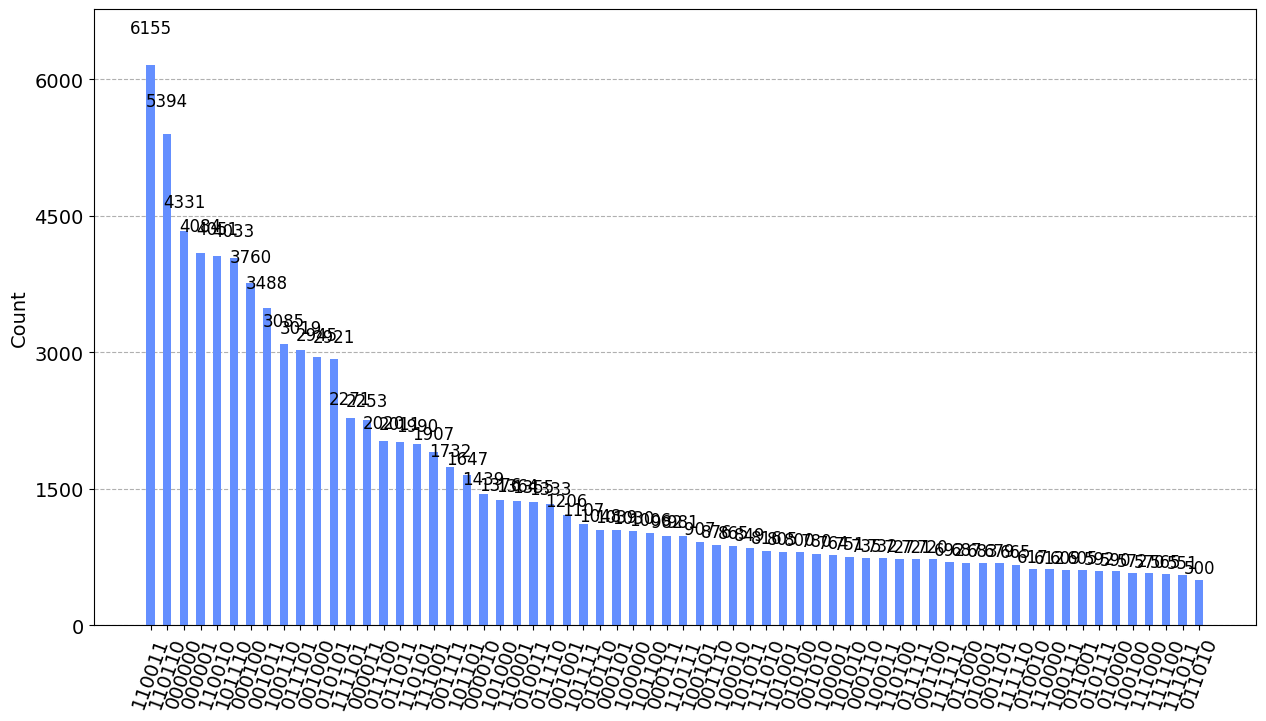

In [89]:
p = 2
obj_cost = []
obj = get_black_box_objective(p)
#np.random.seed(12345)
init_point =  np.random.uniform(0,np.pi, 2*p)#np.random.uniform(0,np.pi, 2*p)#np.array([2.5637967 , 3.47032884, 3.31950937, 2.83458509]) #
#np.random.uniform(0,np.pi, 2*p)#np.random.randint(low = -np.pi/3, high =np.pi/4, size = 2*p)
#np.array(np.random.random_sample(size = 2*p))
#
#np.array([np.pi/8, np.pi/8 ,np.pi/8, np.pi/8,np.pi/8,
#       np.pi/4,np.pi/4 ,np.pi/4 ,np.pi/4, np.pi/4 ])
#np.array([0.81069872, 2.2067517 , 0.83830696, 2.15579759, 0.37060699,
#       2.42068091, 6.1575306 , 2.2453419 , 3.85060091, 6.137845  ])

# We are going to limit the number of iterations to 2500 
res_sample = minimize(obj, init_point, method='Powell', options={'maxiter':5000,'disp': True})
print(res_sample)

optimal_theta = res_sample['x']
qc = create_qaoa_circuit(prob_stat, optimal_theta[:p], optimal_theta[p:])
counts = invert_counts(backend.run(qc, shots = 100000).result().get_counts())
print(counts["110011"])

plot_histogram(counts,figsize=(15,8),sort='value_desc')

In [23]:
obj_cost_random = obj_cost

In [54]:
for i in range(len(list(final.keys()))):
    print(i,list(final.values())[i] ,compute_Hijk(list(final.keys())[i]) )

0 0.00476 -2
1 0.00994 -2
2 0.00885 4
3 0.00646 0
4 0.0102 -4
5 0.01371 0
6 0.00756 2
7 0.02907 -2
8 0.00601 -2
9 0.02214 -2
10 0.00892 0
11 0.01457 4
12 0.0214 -2
13 0.02714 -4
14 0.01229 0
15 0.04683 0
16 0.02513 2
17 0.02098 2
18 0.00511 6
19 0.01028 0
20 0.01097 0
21 0.04165 -4
22 0.00736 -4
23 0.00645 -2
24 0.00594 2
25 0.03588 -6
26 0.01195 0
27 0.01931 0
28 0.00856 0
29 0.00818 4
30 0.00797 0
31 0.05838 -8
32 0.0162 -2
33 0.01018 0
34 0.02293 2
35 0.04189 -2
36 0.01654 2
37 0.01573 -2
38 0.05205 -4
39 0.01521 -2
40 0.00909 0
41 0.00797 0
42 0.03529 0
43 0.03289 2
44 0.00666 8
45 0.01164 0
46 0.00785 -2
47 0.00647 2
48 0.02015 2
49 0.00796 2
50 0.03024 -2
51 0.00957 -4
52 0.00627 2
53 0.01036 0
54 0.00621 4
55 0.01227 4
56 0.00656 4
57 0.0066 0
58 0.00735 -2
59 0.00829 -2
60 0.00664 2
61 0.00647 2
62 0.00723 2
63 0.00529 2


/tmp/ipykernel_7135/4048088934.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.get_children()[int(p)].set_color("tab:pink")


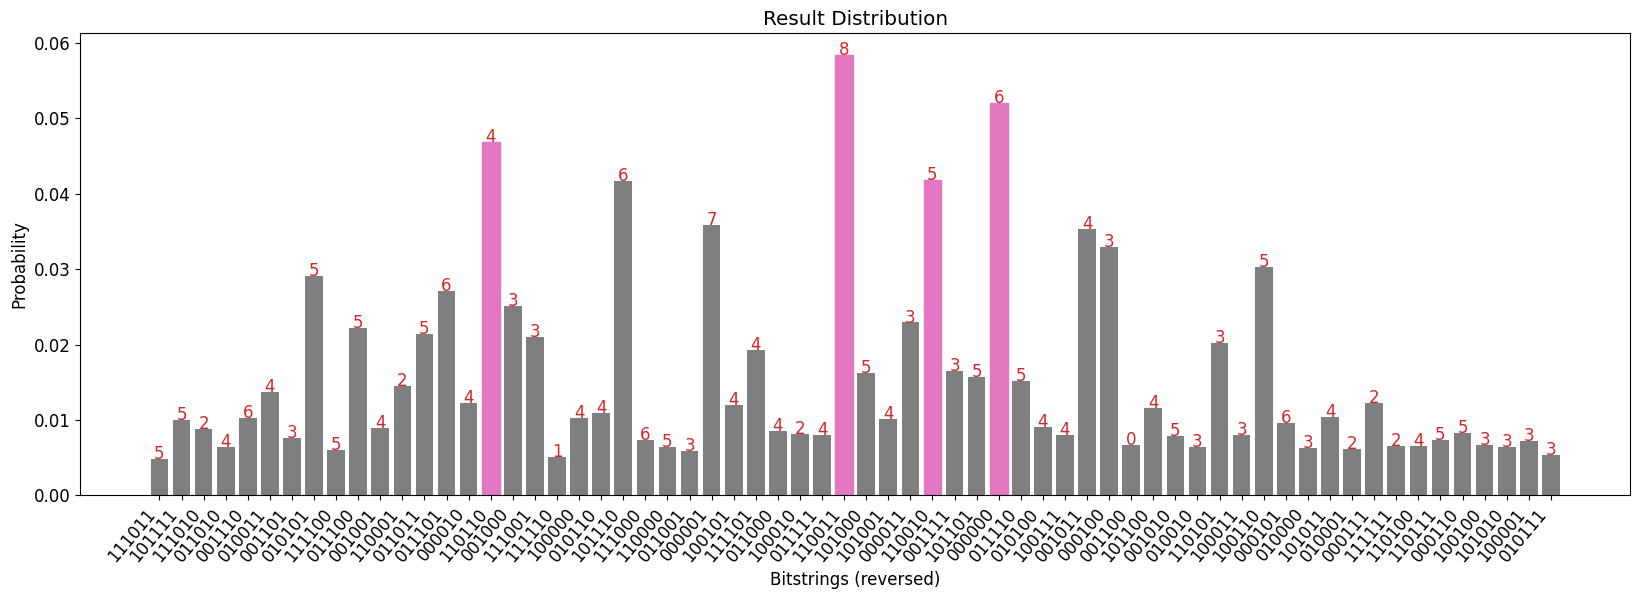

In [87]:
final_dist_prob = {key:val/shots for key,val in counts.items()}
#final_dist_prob

import matplotlib

matplotlib.rcParams.update({"font.size":12})
final = final_dist_prob
values = np.abs(list(final.values()))
top_4 = sorted(values, reverse=True)[:4]
position = []
for val in top_4:
    position.append(np.where(values == val)[0])
    
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(1, 1, 1)

plt.xticks(rotation=50, ha='right')
plt.title("Result Distribution")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")

ax.bar(list(final.keys()), list(final.values()), color="tab:grey")
#print(ax.get_children())
for p in position:    
    ax.get_children()[int(p)].set_color("tab:pink")
for i in range(len(list(final.keys()))):
    plt.text(i, list(final.values())[i],compute_satisfied_constraints(list(final.keys())[i]), ha ='center',color="tab:red")
plt.show()

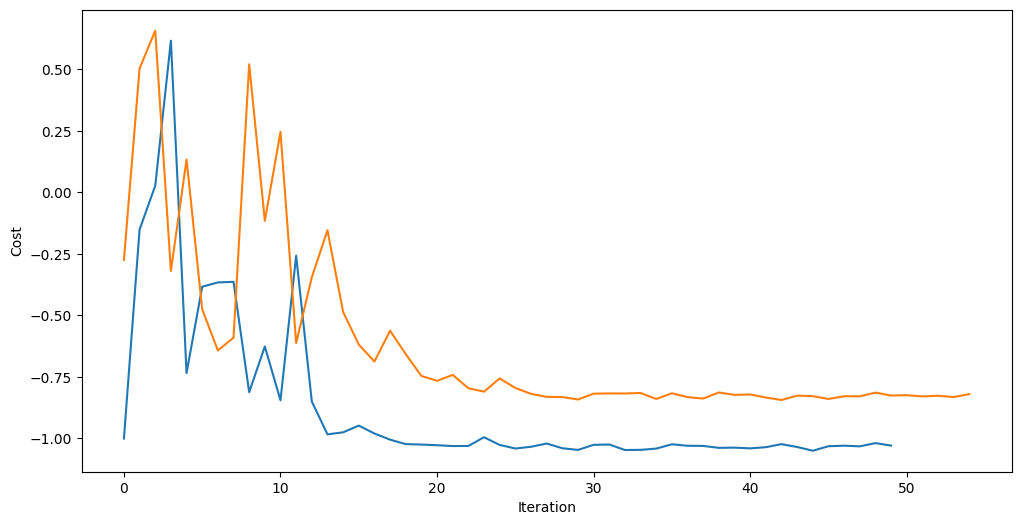

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(obj_cost)
plt.plot(obj_cost_random )
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [463]:
res_sample['x']

array([2.5637967 , 3.47032884, 3.31950937, 2.83458509])

[0.37602896 2.96097255 2.59271668 2.14907856 1.35935531 3.57763063
 1.20907608 0.15670827 1.75872055 1.51064265 2.28535716 1.13617704
 2.72844447 1.47289328 1.88009195 2.09666862 1.39859969 1.9758639
 0.52712297 2.23786823 1.2545413  0.63714109 0.85729793 0.79527026
 0.48299064 2.44975208 1.82375899 0.44511882 2.11031946 1.2291072
 1.88341806 2.22046471 0.95244688 0.64719141 0.69149184 0.31195829
 0.1282841  0.17111384 0.81932916 0.67460567]
108778


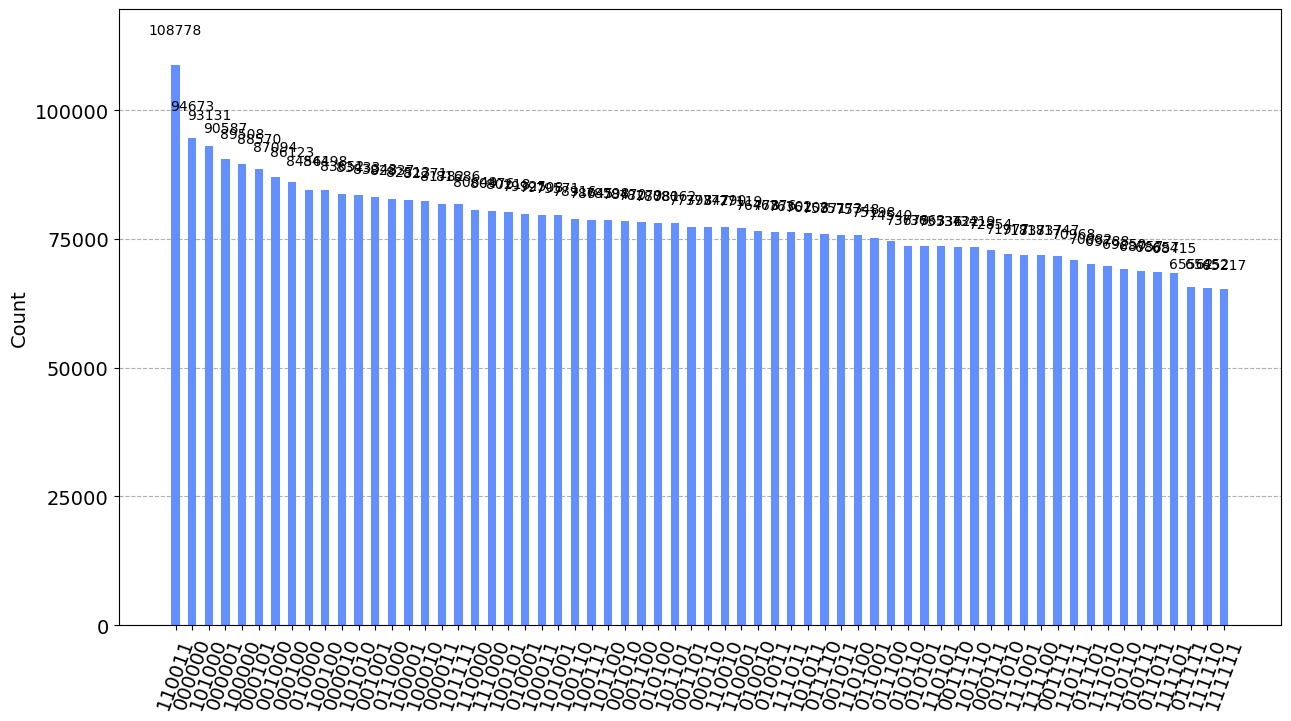

In [417]:
print(optimal_theta)
qc = create_qaoa_circuit(prob_stat, optimal_theta[:p], optimal_theta[p:])
counts = invert_counts(backend.run(qc, shots = 5000000).result().get_counts())
print(counts["110011"])

plot_histogram(counts,figsize=(15,8),sort='value_desc')

In [413]:
optimal_p15 = res_sample['x']
optimal_p15

array([ 1.32597242,  2.74745697,  3.03879865,  0.81897799,  3.12841319,
        2.75133142,  2.89321433,  0.77508901,  2.58997642,  3.74785634,
        3.45894927, -0.05015984, -0.10195131,  1.30153515,  3.47790455,
        0.17737481,  0.51363389,  2.345905  ,  0.4877005 ,  2.10090131,
        1.37495115,  0.23411011,  2.40942993,  2.55639146,  0.24050789,
        0.05389135,  2.47971592,  0.42899316,  1.37099085,  1.48301703])

In [404]:
res_sample['x'] # this is also for p=14 and gives correct results 
optimal_p14 = np.array([2.46717426, 3.00818821, 1.98738215, 0.51943302, 1.47798483,
       2.26687907, 2.69527222, 3.59806206, 1.25363317, 0.81382737,
       1.84748027, 0.81099626, 0.56798842, 2.2037671 , 2.46831956,
       1.67773372, 2.85703099, 2.03007325, 3.00998746, 1.66513797,
       1.17659221, 2.18842567, 1.55256541, 0.67794328, 0.81676293,
       2.49437915, 1.56425585, 2.90167423])
optimal_p14

array([2.46717426, 3.00818821, 1.98738215, 0.51943302, 1.47798483,
       2.26687907, 2.69527222, 3.59806206, 1.25363317, 0.81382737,
       1.84748027, 0.81099626, 0.56798842, 2.2037671 , 2.46831956,
       1.67773372, 2.85703099, 2.03007325, 3.00998746, 1.66513797,
       1.17659221, 2.18842567, 1.55256541, 0.67794328, 0.81676293,
       2.49437915, 1.56425585, 2.90167423])

In [402]:
res_sample['x'] # this is also for p=13 and gives correct results

array([4.04806048, 2.21419266, 2.44210546, 0.51986969, 1.1392608 ,
       2.42259302, 2.82583013, 1.05090573, 1.61466065, 1.58614484,
       1.59040805, 0.16026511, 2.85269823, 2.04083924, 2.71608229,
       1.33956888, 2.45812429, 0.34441843, 0.6721392 , 1.0512721 ,
       1.29775632, 1.07767139, 2.05528048, 0.68173842, 1.4584624 ,
       0.28035532])

In [397]:
optimal_p13 = res_sample['x']
optimal_p13

array([0.76972186, 0.21614259, 2.06634391, 3.13733993, 0.35528609,
       2.34553922, 1.56192651, 3.12972297, 0.81404752, 2.58734145,
       2.71366819, 1.59917998, 2.60264055, 2.32289179, 0.47070704,
       2.11667147, 2.42553559, 2.60596714, 1.2669153 , 2.11868359,
       1.28007435, 3.67365226, 3.13862596, 2.9125232 , 2.14772309,
       2.9263169 ])

In [391]:
p = 12
obj = get_black_box_objective(p)
init_point =optimal_p12
# np.array([ 3.11565228, -0.12337345,  1.63087269,  3.69366458,  2.71891602,
#         0.87744704,  3.73359457,  2.30635508,  2.31134278,  4.53427049,
#         1.44036469,  2.81236765,  4.48644134,  3.54022047,  1.01734194,
#         1.59339517,  3.10740361,  0.79416291,  2.89232379,  0.48890411,
#         0.18858554,  3.1683361 ,  3.07631809,  0.15980239,  1.49874631,
#         1.39182307])
#np.array([2.30302899, 0.07125167, 1.388045  , 3.34961009, 2.75406291,0.72737635, 2.59627503, 
# 1.94457182, 2.67098935, 4.01411024,1.48831868,2.38280768, 0.16124153, 1.92063935,3.28411534, 0.85480143, 2.71213942, 0.66752842, 0.22987818,3.39335127, 3.23494977, 0.16921106 ])
#np.random.uniform(0,np.pi, 2*p)#np.random.randint(low = -np.pi/3, high =np.pi/4, size = 2*p)
#np.array(np.random.random_sample(size = 2*p))
#
#np.array([np.pi/8, np.pi/8 ,np.pi/8, np.pi/8,np.pi/8,
#       np.pi/4,np.pi/4 ,np.pi/4 ,np.pi/4, np.pi/4 ])
#np.array([0.81069872, 2.2067517 , 0.83830696, 2.15579759, 0.37060699,
#       2.42068091, 6.1575306 , 2.2453419 , 3.85060091, 6.137845  ])

# We are going to limit the number of iterations to 2500
res_sample = minimize(obj, init_point, method='COBYLA', options={'maxiter':5000,'disp': True})
print(res_sample)



energy -0.543424
energy 0.103764
energy -0.047332
energy -0.065336
energy -0.321592
energy -0.298016
energy 0.05672
energy 0.054748
energy -0.265644
energy -0.383596
energy -0.315748
energy -0.459264
energy -0.524832
energy 0.008496
energy 0.023464
energy 0.067016
energy 0.050752
energy 0.107012
energy -0.212892
energy 0.17212
energy 0.043496
energy 0.075168
energy -0.031708
energy 0.142952
energy 0.065708
energy -0.018548
energy -0.044252
energy -0.295684
energy -0.51422
energy -0.385
energy -0.517548
energy -0.138284
energy -0.492088
energy -0.26456
energy -0.479636
energy -0.278568
energy -0.514256
energy -0.371724
energy -0.54324
energy -0.494096
energy -0.508584
energy -0.455124
energy -0.463592
energy -0.345688
energy -0.488956
energy -0.345708
energy -0.494556
energy -0.363808
energy -0.506816
energy -0.3593
energy -0.401336
energy -0.492996
energy -0.528628
energy -0.541328
energy -0.51552
energy -0.52956
energy -0.528352
energy -0.542452
energy -0.53202
energy -0.53344
energy 

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.555664
       x: [ 2.302e+00  6.391e-02 ...  1.695e-01  1.505e+00]
    nfev: 208
   maxcv: 0.0


   NFVALS =  208   F =-5.556640E-01    MAXCV = 0.000000E+00
   X = 2.301794E+00   6.390617E-02   1.391126E+00   3.335771E+00   2.755631E+00
       7.308807E-01   2.595325E+00   1.940078E+00   2.667717E+00   4.015630E+00
       1.484335E+00   2.743370E+00   2.410397E+00   1.595766E-01   1.919923E+00
       3.285843E+00   8.548811E-01   2.710971E+00   6.660629E-01   2.299194E-01
       3.392940E+00   3.235908E+00   1.694764E-01   1.505281E+00


In [389]:
res_sample['x'] #-0.6

array([ 3.11371711, -0.09466241,  1.58340268,  3.6838201 ,  2.72497401,
        0.86795906,  3.73990467,  2.29547298,  2.31599684,  4.52399363,
        1.44630631,  2.80542199,  4.49540393,  3.30137491,  1.90525065,
        1.59307993,  3.10578053,  0.79545892,  2.89046525,  0.54433052,
        0.18698878,  3.16725874,  3.07572282,  0.15851524,  1.49749799,
        1.39083507])

In [378]:
optimal_p11 = res_sample['x']
optimal_p11

array([ 3.21697585, -0.18236952,  1.13176884,  3.28311388,  2.27860872,
        0.86860155,  3.83037935,  2.05870431,  2.62121605,  4.01334712,
        2.61062444,  3.34684404,  0.1193555 ,  1.80001246,  3.40698521,
        0.75127124,  2.60242968,  0.79615854,  0.48103429,  3.49698763,
        3.12878161,  0.08309016])

In [374]:
optimal_p12 = res_sample['x']
optimal_p12

array([2.30302899, 0.07125167, 1.388045  , 3.34961009, 2.75406291,
       0.72737635, 2.59627503, 1.94457182, 2.67098935, 4.01411024,
       1.48831868, 2.75742891, 2.38280768, 0.16124153, 1.92063935,
       3.28411534, 0.85480143, 2.71213942, 0.66752842, 0.22987818,
       3.39335127, 3.23494977, 0.16921106, 1.5116568 ])

In [341]:
optimal_p10 = res_sample['x']
optimal_p10

array([ 1.37655708,  2.50108479,  0.9888627 ,  1.51361233,  3.9454176 ,
        0.8488259 ,  0.02636498, -0.00622211,  0.40840173,  0.47821508,
        2.72009591,  2.67643376,  1.47227738,  0.45245005,  0.49657922,
        0.24570488,  0.98997904,  1.1178083 ,  0.34180066,  3.2828497 ])

In [353]:
res_sample['x']

array([ 3.06201569,  3.56495205,  1.22226367,  2.90736731,  2.06995591,
        0.8163617 ,  2.38226042,  0.85707172,  2.94731754,  3.37047613,
        2.65525258,  2.47364417,  4.03804538,  1.4453417 , -0.24771728,
        1.61378715, -0.10342437,  1.51508253,  2.04117369,  1.23271793,
        2.14222912,  2.02528089])

60480


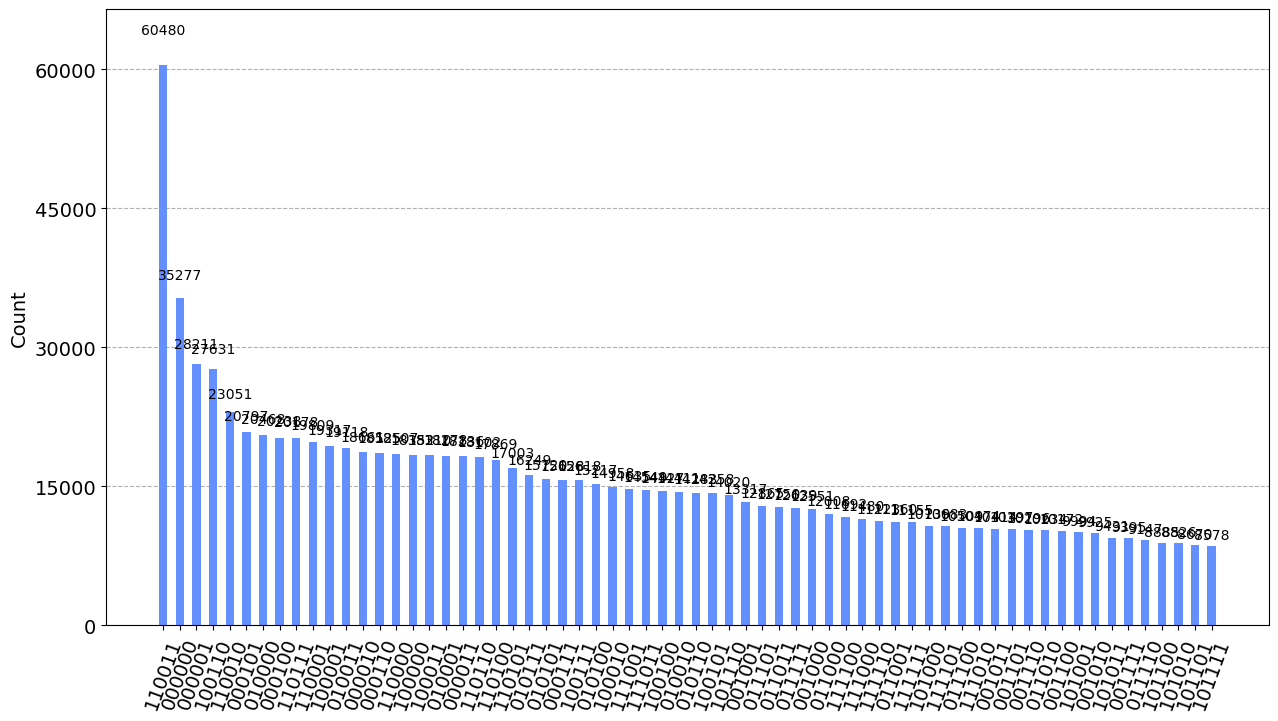

In [392]:
optimal_theta = res_sample['x']
qc = create_qaoa_circuit(prob_stat, optimal_theta[:p], optimal_theta[p:])
counts = invert_counts(backend.run(qc, shots = 1000000).result().get_counts())
print(counts["110011"])

plot_histogram(counts,figsize=(15,8),sort='value_desc')

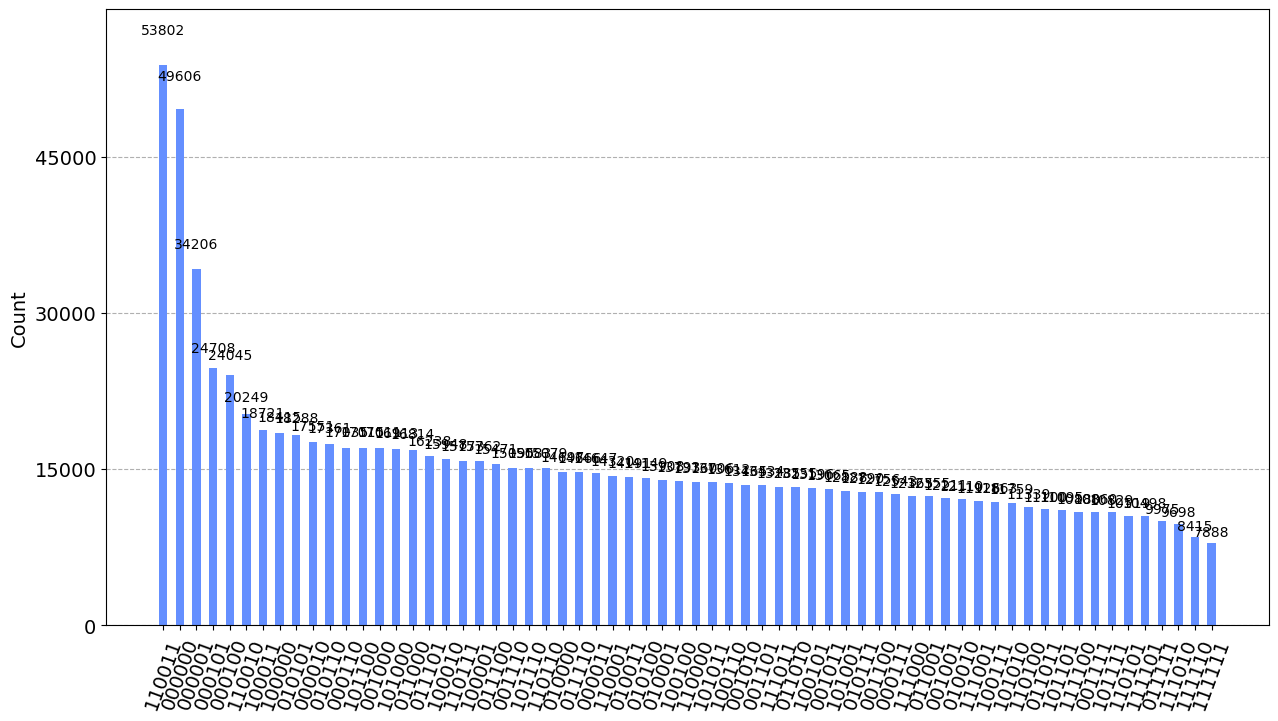

In [380]:
from qiskit.visualization import plot_histogram

plot_histogram(counts,figsize=(15,8),sort='value_desc')

<BarContainer object of 9 artists>

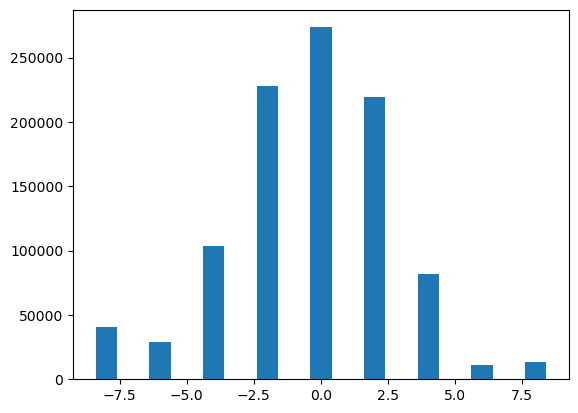

In [297]:
energies = defaultdict(int)
for k, v in counts.items():
    energies[compute_Hijk(k)] += v
    
x,y = zip(*energies.items())
plt.bar(x,y)


In [ ]:
#TODO 
# Thoroughly check the little-endian and big-endian of the counts used 
#make a dictionary with keys as vars and values as Vijk aka constraints and then we can apply gates to the respective qubits 
# try a different prob_stat as in 4 constraints and 3 variables 

### For generating the problem 

In [16]:
test = np.array([[1,2],[3,4],[5,6]])
print(test.shape)
test[:,0]

(3, 2)


array([1, 3, 5])

In [40]:
import random

In [54]:
mat = [[1,2,3],[4,5,6],[1,2,3],[7,8,9],[5,4,6]]

set(tuple(row) for row in mat)

{(1, 2, 3), (4, 5, 6), (5, 4, 6), (7, 8, 9)}

In [59]:
from math import comb 
comb(6,3)

20

In [78]:
def generate_random_3_xorsat(r=3,n = int, num_clauses=int):
    max_clauses = comb(n,r)
    if num_clauses>max_clauses:
        num_clauses = max_clauses
        print(f"No. of asked clauses is larger than maximum possible clauses, therfore, only {max_clauses} will be generated")
    var = range(0,n)

    cl = []
    while len(cl)<num_clauses:

        for i in range(num_clauses):
            #c = tuple(np.sort(random.sample(var,k=r)))
            #print("c=",c)
            cl.append(tuple(np.sort(random.sample(var,k=r))))
            cl = list(set(cl))

    b = np.random.choice(2, num_clauses)

    return np.array([list(row) for row in cl ]), b

generate_random_3_xorsat(r=3,n=5,num_clauses=24)


No. of asked clauses is larger than maximum possible clauses, therfore, only 10 will be generated


(array([[0, 1, 4],
        [0, 2, 4],
        [0, 3, 4],
        [0, 1, 3],
        [1, 2, 3],
        [0, 2, 3],
        [1, 3, 4],
        [2, 3, 4],
        [0, 1, 2],
        [1, 2, 4]]),
 array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0]))

In [81]:


def find_num_solutions(A_pass, b_pass):
    """
        Using row reduction, determines the number of solutions that satisfy 
        the linear system of equations given by A_pass.X = b_pass mod 2.
        Returns zero if no solutions exist.
 
    """
    A = np.copy(A_pass)
    b = np.copy(b_pass)

    M, N = A.shape

    h = 0
    k = 0

    while h < M and k < N:

        max_i = h

        for i in range(h, M):
            if A[i, k] == 1:
                max_i = i
                break

        if A[max_i, k] == 0:
            k += 1
        else:
            if h != max_i:
                A[[h, max_i]] = A[[max_i, h]]
                b[[h, max_i]] = b[[max_i, h]]

            for u in range((h + 1), M):
                flip_val = A[u, k]
                A[u] = (A[u] + flip_val * A[h]) % 2
                b[u] = (b[u] + flip_val * b[h]) % 2

            h += 1
            k += 1

    # Find rows with all zeros
    num_all_zeros_rows = 0

    solutions_exist = True

    for i in range(M):
        if not np.any(A[i]):  # All-zero row encountered

            if b[i] != 0:
                solutions_exist = False
                break

            num_all_zeros_rows += 1

    if solutions_exist:
        rank = M - num_all_zeros_rows
        num_solutions = np.power(2, N - rank)
    else:
        num_solutions = 0

    return num_solutions

In [85]:
def plant_regular_xorsat(k, n):
    """
    Repetitively generates k-regular k-XORSAT problems until an instance
    with non-zero solutions is obtained.
    Returns the resultant XORSAT instance formulated as an
    Ising minimization problem.
    Also returns the ground state energy and ground state degenaracy.

    """

    while True:
        indices, b = regular_xorsat(k, n)

        A = np.zeros((n, n), dtype=int)

        for i, row in enumerate(indices):
            A[i, row] = 1

        num_solutions = find_num_solutions(A, b)

        if num_solutions != 0:
            break

    gs_energy = -n

    bonds = []

    for i in range(n):
        bonds.append(tuple(indices[i]) + (-np.power(-1, b[i]),))

    return bonds, gs_energy, num_solutions

plant_regular_xorsat(3,10)

([(5, 4, 3, -1),
  (8, 9, 2, -1),
  (4, 5, 1, 1),
  (3, 7, 4, 1),
  (0, 1, 8, -1),
  (9, 2, 6, -1),
  (1, 0, 7, -1),
  (7, 6, 5, -1),
  (2, 8, 0, -1),
  (6, 3, 9, 1)],
 -10,
 2)

In [80]:
import numpy as np 

def regular_xorsat(k, n):
    """
    Generates a k-regurlar k-XORSAT instance with n variables.

    """

    indices = np.zeros((n, k), dtype=int)
    #print(indices)
    count = 0
    while True:

        for i in range(k):
            #print(indices[:, i])
            x = np.random.permutation(n)
            #print("x=",x)
            indices[:, i] = x
            #print(indices)

        if all(np.unique(row).size == k for row in indices):
            break
        

    b = np.random.choice(2, n)

    return indices, b

regular_xorsat(k=3,n=4)

(array([[0, 1, 2],
        [3, 0, 1],
        [2, 3, 0],
        [1, 2, 3]]),
 array([0, 1, 0, 1]))